In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq, rfft


In [2]:
w1 = 0.1
w2 = 0.3
w3= 0.6

In [3]:
def squa(x,y,z):
    return (np.sqrt(x)+np.sqrt(y)+np.sqrt(z))**2

In [4]:
def least_sq(sample_spectrum, components):
   # sample_spectrum (unknown spectrum): array of w values.
   # components (known spectra): array of n (number of components) columns with w values.
   # This def returns an array of n values. Each value is the similarity score for the sample_spectrum and a component spectrum.
    similarity = np.dot((np.dot(components, components.T)).T , np.dot(components, sample_spectrum))
    return similarity

In [5]:
def Gauss(x, mu, sigma, intensity = 1):
# x is an array
# mu is the expected value
# sigma is the square root of the variance
# intensity is a multiplication factor
# This def returns the Gaussian function of x
    return intensity/(sigma * np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)


In [6]:
im3 = Image.open('empty.png').convert('RGB')
iml3 = Image.open('empty.png').convert('L')
imal3 = np.array(iml3)
imar3 = np.array(im3)[:,:,0]
imag3 = np.array(im3)[:,:,1]
imab3 = np.array(im3)[:,:,2]
#image13 = np.exp(w1*np.log(imar3)+w2*np.log(imag3)+w3*np.log(imab3))
image23 = (imar3+imag3+imab3)/3
image3 = squa(imar3,imag3,imab3)
#im = np.zeros((96,80))

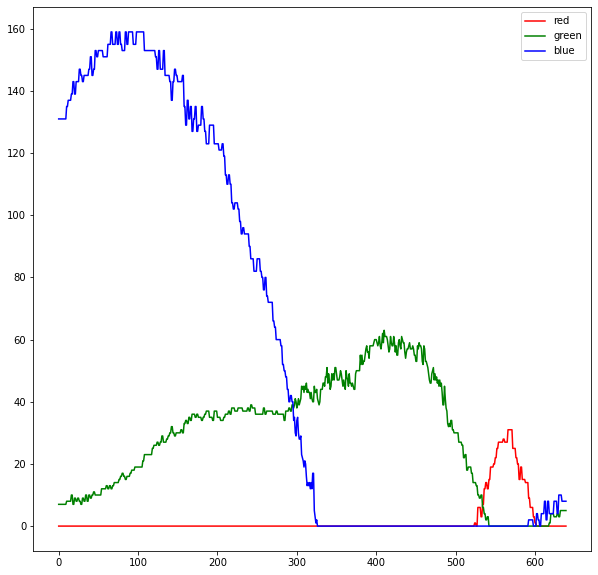

In [7]:
plt.figure(figsize=(10,10))
plt.plot(imar3[0,:],'red',label='red')
plt.plot(imag3[0,:],'green',label='green')
plt.plot(imab3[0,:],'blue',label='blue')
plt.legend()

NameError: name 'imal5' is not defined

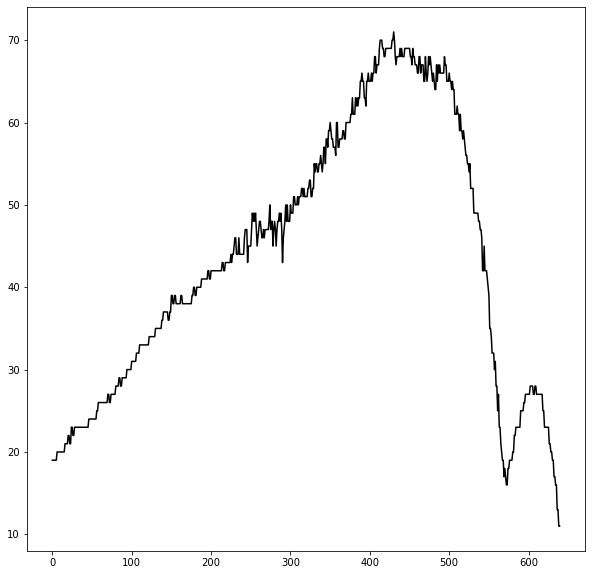

In [8]:
plt.figure(figsize=(10,10))
plt.plot(imal3[100,:],'black')
plt.plot(imal5[100,:],'blue')
plt.plot(imal6[100,:],'green')
plt.plot(imal7[100,:],'pink')
plt.plot(imal8[100,:],'orange')

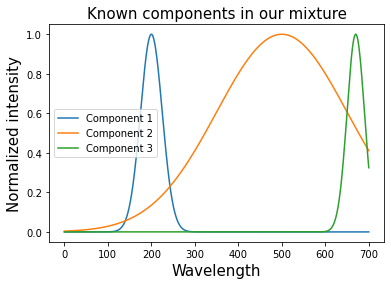

In [9]:
# X-axis (Wavelengths)
x_range =  np.linspace(0, 700, 1000)
# Let's create three different components
# Component A
mu_a1 = 100+100
sigma_a1 = 25
intensity_a1 = 1
gauss_a =  Gauss(x_range, mu_a1, sigma_a1, intensity_a1) 
# Component B
mu_b = 400+100
sigma_b = 150
intensity_b = 1
gauss_b = Gauss(x_range, mu_b, sigma_b, intensity_b)
# Component C
mu_c1 = 570+100
sigma_c1 = 20
intensity_c1 = 1
gauss_c = Gauss(x_range, mu_c1, sigma_c1, intensity_c1) 
# Spectra normalization:
component_a = gauss_a/np.max(gauss_a)
component_b = gauss_b/np.max(gauss_b)
component_c = gauss_c/np.max(gauss_c)
# How do they look?
plt.plot(x_range, component_a, label = 'Component 1')
plt.plot(x_range, component_b, label = 'Component 2')
plt.plot(x_range, component_c, label = 'Component 3')
plt.title('Known components in our mixture', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Normalized intensity', fontsize = 15)
plt.legend()
plt.show()

284


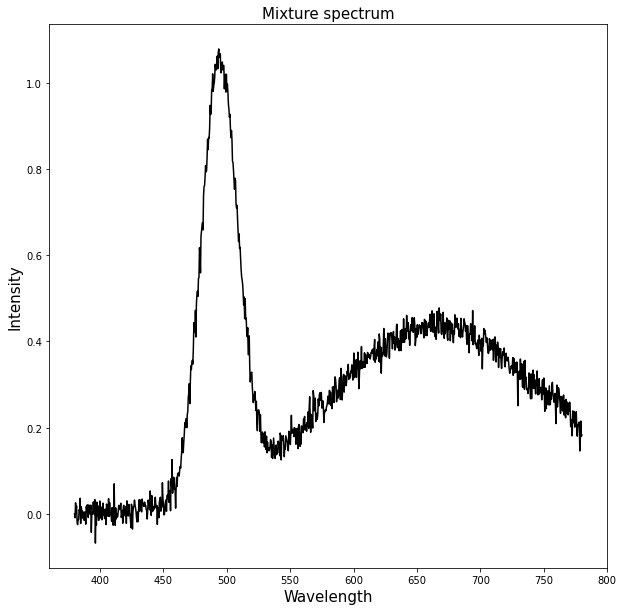

In [10]:
# What concentrations we want them to have in our mixture:
x_range_ = np.linspace(380, 780, 1000)
c_a = 160/160
c_b = 70/160
c_c = 5/160
# Let's build the spectrum to be studied: The mixture spectrum
query_spectra = c_a * component_a + c_b * component_b + c_c *component_c
# Let's add it some noise for a bit of realism:
query_spectra = query_spectra +  np.random.normal(0, 0.02, len(x_range))
print(np.argmax(query_spectra))
plt.figure(figsize=(10,10))
plt.plot(x_range_, query_spectra, color = 'black', label = 'Mixture spectrum with noise')
plt.title('Mixture spectrum', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Intensity',  fontsize = 15)
plt.show()

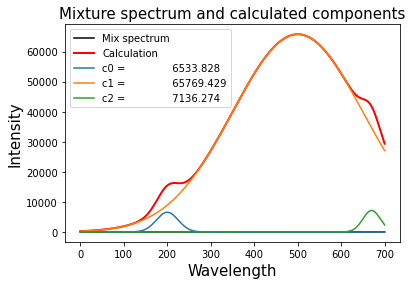

In [11]:
# Generate the components matrix or K matrix
components = np.array([component_a, component_b, component_c])
# Apply Least squares
cs = least_sq(query_spectra, components)
# And plot the result:
plt.plot(x_range, query_spectra, color = 'black', label = 'Mix spectrum' ) # Plot the unknown spectrum
plt.plot(x_range, np.dot(cs,components), color = 'red', linewidth = 2, label = 'Calculation') # Plot the calculated spectrum
for i in np.arange(len(cs)):
    plt.plot(x_range, cs[i]*components[i], label = 'c' + str(i)+ ' =               ' + str(np.round(cs[i], 3)))
plt.title('Mixture spectrum and calculated components', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Intensity', fontsize = 15)
plt.legend()
plt.show()

In [12]:
im4 = Image.open('green.png').convert('RGB')
iml4 = Image.open('green.png').convert('L')
imal4 = np.array(iml4)
imar4 = np.array(im4)[:,:,0]
imag4 = np.array(im4)[:,:,1]
imab4 = np.array(im4)[:,:,2]
#image13 = np.exp(w1*np.log(imar3)+w2*np.log(imag3)+w3*np.log(imab3))
image24 = (imar4+imag4+imab4)/3
image4 = squa(imar4,imag4,imab4)
#im = np.zeros((96,80))

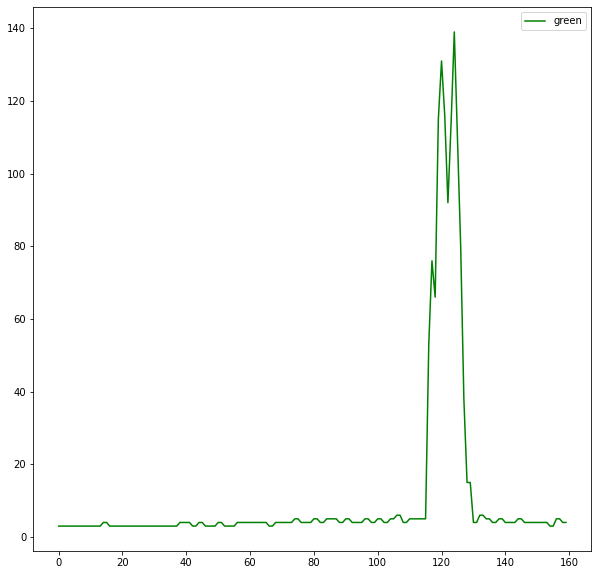

In [13]:
plt.figure(figsize=(10,10))
plt.plot(imal4[50,:],'green',label='green')
plt.legend()

In [14]:
im5 = Image.open('cuso4.png').convert('RGB')
iml5 = Image.open('cuso4.png').convert('L')
imal5 = np.array(iml5)
imar5 = np.array(im5)[:,:,0]
imag5 = np.array(im5)[:,:,1]
imab5 = np.array(im5)[:,:,2]
#image13 = np.exp(w1*np.log(imar3)+w2*np.log(imag3)+w3*np.log(imab3))
image24 = (imar4+imag4+imab4)/3
image4 = squa(imar4,imag4,imab4)
#im = np.zeros((96,80))

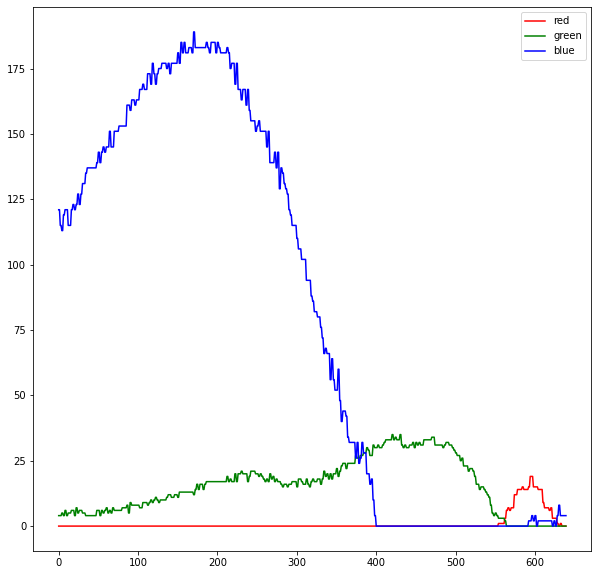

In [15]:
plt.figure(figsize=(10,10))
plt.plot(imar5[100,:],'red',label='red')
plt.plot(imag5[100,:],'green',label='green')
plt.plot(imab5[100,:],'blue',label='blue')
plt.legend()
plt.savefig('my')

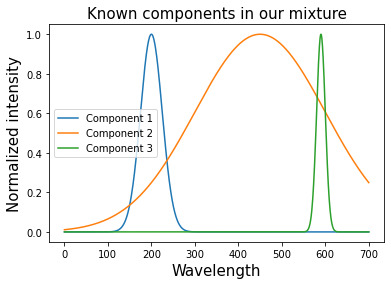

In [16]:
# X-axis (Wavelengths)
x_range =  np.linspace(0, 700, 1000)
# Let's create three different components
# Component A
mu_a2 = 200
sigma_a2 = 25
intensity_a2 = 1
gauss_a2 =  Gauss(x_range, mu_a2, sigma_a2, intensity_a2) 
# Component B
mu_b2 = 450
sigma_b2 = 150
intensity_b2 = 1
gauss_b2 = Gauss(x_range, mu_b2, sigma_b2, intensity_b2)
# Component C
mu_c2 = 590
sigma_c2 = 10
intensity_c2 = 1
gauss_c2 = Gauss(x_range, mu_c2, sigma_c2, intensity_c2) 
# Spectra normalization:
component_a2 = gauss_a2/np.max(gauss_a2)
component_b2 = gauss_b2/np.max(gauss_b2)
component_c2 = gauss_c2/np.max(gauss_c2)
# How do they look?
plt.plot(x_range, component_a2, label = 'Component 1')
plt.plot(x_range, component_b2, label = 'Component 2')
plt.plot(x_range, component_c2, label = 'Component 3')
plt.title('Known components in our mixture', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Normalized intensity', fontsize = 15)
plt.legend()
plt.show()

In [17]:
im6 = Image.open('nino32.png').convert('RGB')
iml6 = Image.open('nino32.png').convert('L')
imal6 = np.array(iml6)
imar6 = np.array(im6)[:,:,0]
imag6 = np.array(im6)[:,:,1]
imab6 = np.array(im6)[:,:,2]
#image13 = np.exp(w1*np.log(imar3)+w2*np.log(imag3)+w3*np.log(imab3))
image24 = (imar4+imag4+imab4)/3
image4 = squa(imar4,imag4,imab4)
#im = np.zeros((96,80))

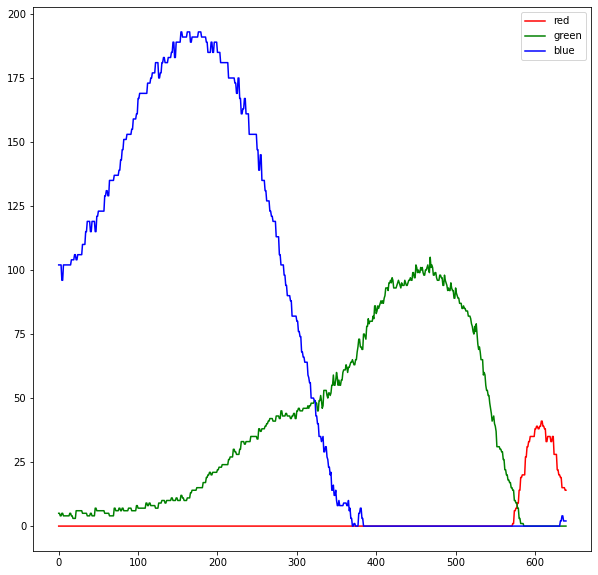

In [18]:
plt.figure(figsize=(10,10))
plt.plot(imar6[100,:],'red',label='red')
plt.plot(imag6[100,:],'green',label='green')
plt.plot(imab6[100,:],'blue',label='blue')
plt.legend()
plt.savefig('my')

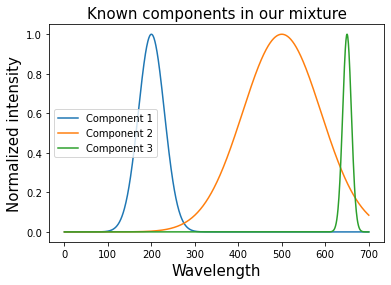

In [19]:
# X-axis (Wavelengths)
x_range =  np.linspace(0, 700, 1000)
# Let's create three different components
# Component A
mu_a3 = 150+50
sigma_a3 = 30
intensity_a3 = 1
gauss_a3 =  Gauss(x_range, mu_a3, sigma_a3, intensity_a3) 
# Component B
mu_b3_1 = 450+50
sigma_b3_1 = 90
intensity_b3_1 = 100/100
gauss_b3 = Gauss(x_range, mu_b3_1, sigma_b3_1, intensity_b3_1)
# Component C
mu_c3 = 600+50
sigma_c3 = 10
intensity_c3 = 1
gauss_c3 = Gauss(x_range, mu_c3, sigma_c3, intensity_c3) 
# Spectra normalization:
component_a3 = gauss_a3/np.max(gauss_a3)
component_b3 = gauss_b3/np.max(gauss_b3)
component_c3 = gauss_c3/np.max(gauss_c3)
# How do they look?
plt.plot(x_range, component_a3, label = 'Component 1')
plt.plot(x_range, component_b3, label = 'Component 2')
plt.plot(x_range, component_c3, label = 'Component 3')
plt.title('Known components in our mixture', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Normalized intensity', fontsize = 15)
plt.legend()
plt.show()

In [20]:
# What concentrations we want them to have in our mixture:
x_range_ = np.linspace(380, 780, 1000)
c_a3 = 190/190
c_b3 = 100/190
c_c3 = 3/190
# Let's build the spectrum to be studied: The mixture spectrum
query_spectra3 = c_a3 * component_a3 + c_b3 * component_b3 + c_c3 *component_c3
# Let's add it some noise for a bit of realism:
query_spectra3 = query_spectra3 +  np.random.normal(0, 0.02, len(x_range))

In [21]:
im7 = Image.open('cocl3.png').convert('RGB')
iml7 = Image.open('cocl3.png').convert('L')
imal7 = np.array(iml7)
imar7 = np.array(im7)[:,:,0]
imag7 = np.array(im7)[:,:,1]
imab7 = np.array(im7)[:,:,2]
#image13 = np.exp(w1*np.log(imar3)+w2*np.log(imag3)+w3*np.log(imab3))
image24 = (imar4+imag4+imab4)/3
image4 = squa(imar4,imag4,imab4)
#im = np.zeros((96,80))

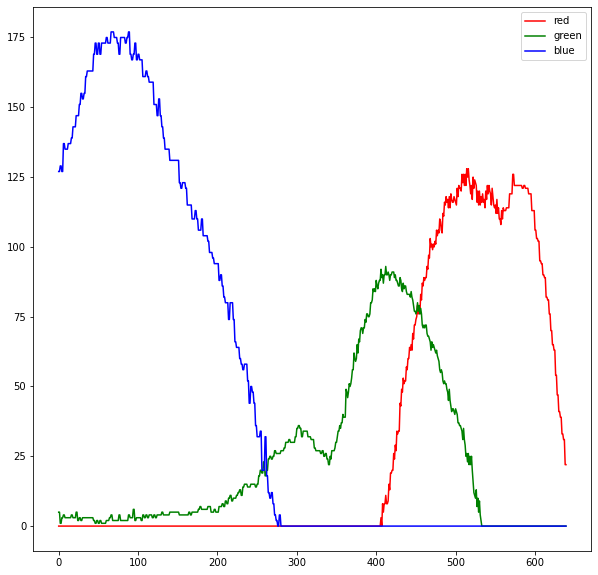

In [22]:
plt.figure(figsize=(10,10))
plt.plot(imar7[360,:],'red',label='red')
plt.plot(imag7[360,:],'green',label='green')
plt.plot(imab7[360,:],'blue',label='blue')
plt.legend()
plt.savefig('my')

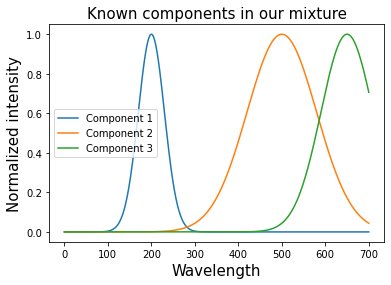

In [23]:
# X-axis (Wavelengths)
x_range =  np.linspace(0, 700, 1000)
# Let's create three different components
# Component A
mu_a4 = 100+100
sigma_a4 = 30
intensity_a4 = 1
gauss_a4 =  Gauss(x_range, mu_a4, sigma_a4, intensity_a4) 
# Component B
mu_b4 = 400+100
sigma_b4 = 80
intensity_b4 = 100/100
gauss_b4 = Gauss(x_range, mu_b4, sigma_b4, intensity_b4)
# Component C
mu_c4 = 550+100
sigma_c4 = 60
intensity_c4 = 1
gauss_c4 = Gauss(x_range, mu_c4, sigma_c4, intensity_c4) 
# Spectra normalization:
component_a4 = gauss_a4/np.max(gauss_a4)
component_b4 = gauss_b4/np.max(gauss_b4)
component_c4 = gauss_c4/np.max(gauss_c4)
# How do they look?
plt.plot(x_range, component_a4, label = 'Component 1')
plt.plot(x_range, component_b4, label = 'Component 2')
plt.plot(x_range, component_c4, label = 'Component 3')
plt.title('Known components in our mixture', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Normalized intensity', fontsize = 15)
plt.legend()
plt.show()

In [24]:
# What concentrations we want them to have in our mixture:
x_range_ = np.linspace(380, 780, 1000)
c_a4 = 175/175
c_b4 = 100/175
c_c4 = 125/175
# Let's build the spectrum to be studied: The mixture spectrum
query_spectra4 = c_a4 * component_a4 + c_b4 * component_b4 + c_c4 *component_c4
# Let's add it some noise for a bit of realism:
query_spectra4 = query_spectra4 +  np.random.normal(0, 0.02, len(x_range))

In [25]:
im8 = Image.open('krovosol.png').convert('RGB')
iml8 = Image.open('krovosol.png').convert('L')
imal8 = np.array(iml8)
imar8 = np.array(im8)[:,:,0]
imag8 = np.array(im8)[:,:,1]
imab8 = np.array(im8)[:,:,2]
#image13 = np.exp(w1*np.log(imar3)+w2*np.log(imag3)+w3*np.log(imab3))
image24 = (imar4+imag4+imab4)/3
image4 = squa(imar4,imag4,imab4)
#im = np.zeros((96,80))

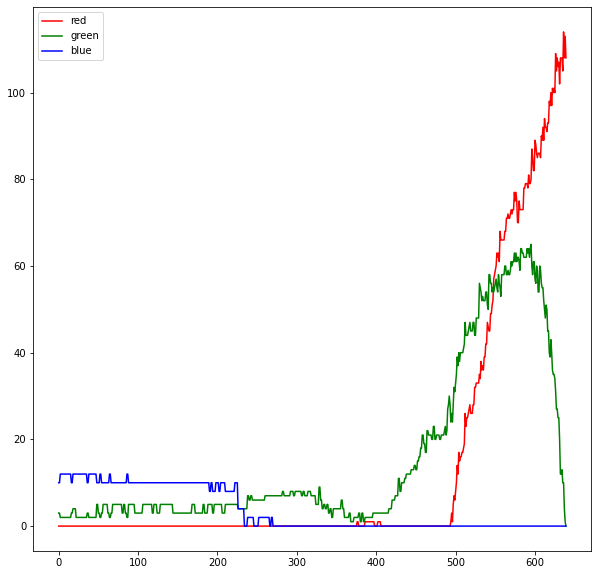

In [26]:
plt.figure(figsize=(10,10))
plt.plot(imar8[240,:],'red',label='red')
plt.plot(imag8[240,:],'green',label='green')
plt.plot(imab8[240,:],'blue',label='blue')
plt.legend()
plt.savefig('my')

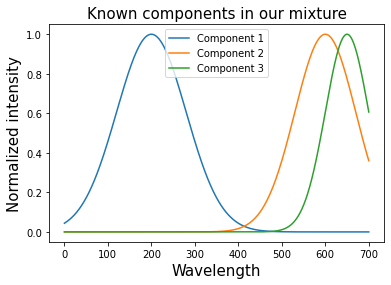

In [27]:
# X-axis (Wavelengths)
x_range =  np.linspace(0, 700, 1000)
# Let's create three different components
# Component A
mu_a5 = 150+50
sigma_a5 = 80
intensity_a5 = 1
gauss_a5 =  Gauss(x_range, mu_a5, sigma_a5, intensity_a5) 
# Component B
mu_b5 = 550+50
sigma_b5 = 70
intensity_b5 = 100/100
gauss_b5 = Gauss(x_range, mu_b5, sigma_b5, intensity_b5)
# Component C
mu_c5 = 600+50
sigma_c5 = 50
intensity_c5 = 1
gauss_c5 = Gauss(x_range, mu_c5, sigma_c5, intensity_c5) 
# Spectra normalization:
component_a5 = gauss_a5/np.max(gauss_a5)
component_b5 = gauss_b5/np.max(gauss_b5)
component_c5 = gauss_c5/np.max(gauss_c5)
# How do they look?
plt.plot(x_range, component_a5, label = 'Component 1')
plt.plot(x_range, component_b5, label = 'Component 2')
plt.plot(x_range, component_c5, label = 'Component 3')
plt.title('Known components in our mixture', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Normalized intensity', fontsize = 15)
plt.legend()
plt.show()

In [28]:
# What concentrations we want them to have in our mixture:
x_range_ = np.linspace(380, 780, 1000)
c_a5 = 15/150
c_b5 = 65/150
c_c5 = 150/150
# Let's build the spectrum to be studied: The mixture spectrum
query_spectra5 = c_a5 * component_a5 + c_b5 * component_b5 + c_c5 *component_c5
# Let's add it some noise for a bit of realism:
query_spectra5 = query_spectra5 +  np.random.normal(0, 0.02, len(x_range))

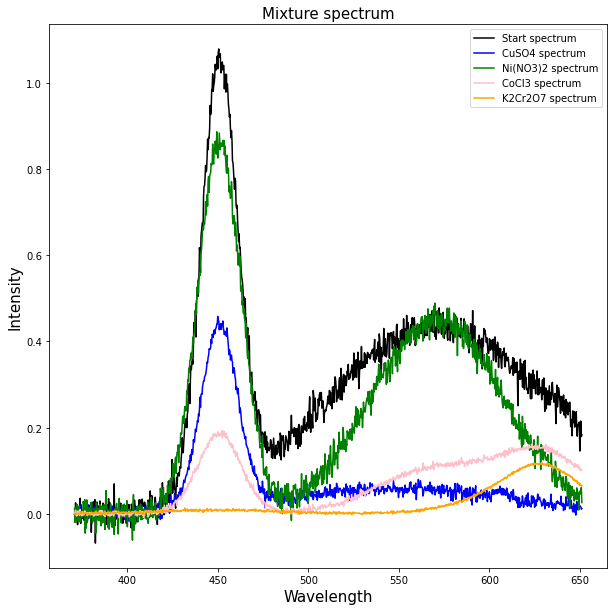

In [48]:
# What concentrations we want them to have in our mixture:
x_range_ = (np.linspace(380, 780, 1000))*0.7+105
c_a2 = 180/180
c_b2 = 25/180
c_c2 = 5/160
# Let's build the spectrum to be studied: The mixture spectrum
query_spectra2 = c_a2 * component_a2 + c_b2 * component_b2 + c_c2 *component_c2
# Let's add it some noise for a bit of realism:
query_spectra2 = query_spectra2 +  np.random.normal(0, 0.02, len(x_range))
plt.figure(figsize=(10,10))
plt.plot(x_range_, query_spectra * 70/70, color = 'black', label = 'Start spectrum')
plt.plot(x_range_, query_spectra2  * 30/70, color = 'blue', label = 'CuSO4 spectrum')
plt.plot(x_range_, query_spectra3 * 60/70, color = 'green', label = 'Ni(NO3)2 spectrum')
plt.plot(x_range_, query_spectra4 * 13/70, color = 'pink', label = 'CoCl3 spectrum')
plt.plot(x_range_, query_spectra5 * 6/70, color = 'orange', label = 'K2Cr2O7 spectrum')
plt.title('Mixture spectrum', fontsize = 15)
plt.title('Mixture spectrum', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Intensity',  fontsize = 15)
plt.legend()
plt.savefig('spec.png')
plt.show()

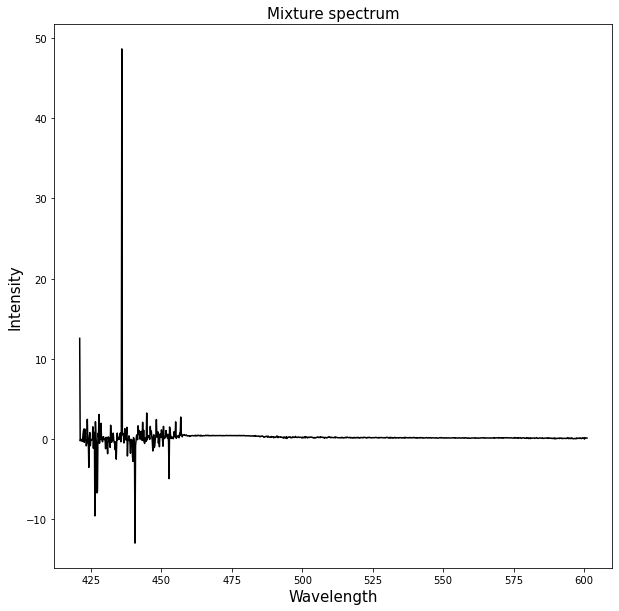

In [46]:
plt.figure(figsize=(10,10))
query_spectra0 = query_spectra
for j in range(0, query_spectra.shape[0]):
    if query_spectra0[j] == 0:
        query_spectra0[j] = 0.1
plt.plot(x_range_, query_spectra2/query_spectra0*3/7, color = 'black', label = 'Mixture spectrum with noise')
plt.title('Mixture spectrum', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Intensity',  fontsize = 15)
plt.show()

In [31]:
im9 = Image.open('start.png').convert('RGB')
iml9 = Image.open('start.png').convert('L')
imal9 = np.array(iml9)
imar9 = np.array(im9)[:,:,0]
imag9 = np.array(im9)[:,:,1]
imab9 = np.array(im9)[:,:,2]
#image13 = np.exp(w1*np.log(imar3)+w2*np.log(imag3)+w3*np.log(imab3))
image24 = (imar4+imag4+imab4)/3
image4 = squa(imar4,imag4,imab4)
#im = np.zeros((96,80))

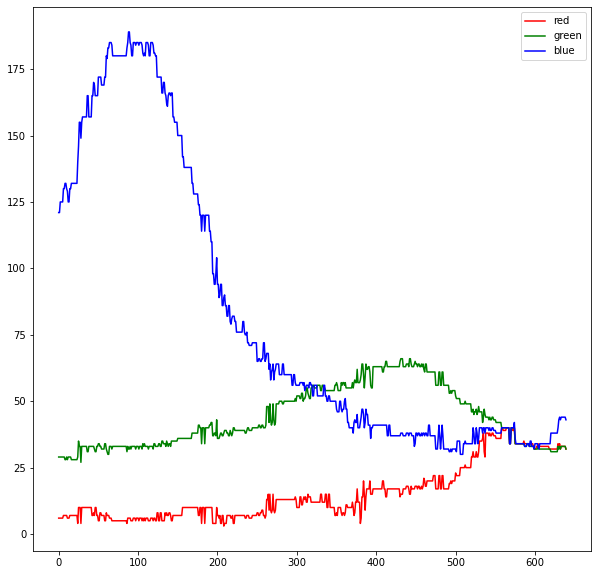

In [32]:
plt.figure(figsize=(10,10))
plt.plot(imar9[100,:]-55,'red',label='red')
plt.plot(imag9[100,:]-55,'green',label='green')
plt.plot(imab9[100,:]-55,'blue',label='blue')
plt.legend()
plt.savefig('my')

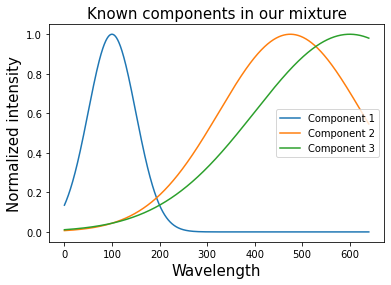

In [33]:
# X-axis (Wavelengths)
x_range =  np.linspace(0, 640, 1000)
# Let's create three different components
# Component A
mu_a9 = 100
sigma_a9 = 50
intensity_a9 = 1
gauss_a9 =  Gauss(x_range, mu_a9, sigma_a9, intensity_a9) 
# Component B
mu_b9 = 475
sigma_b9 = 150
intensity_b9 = 100/100
gauss_b9 = Gauss(x_range, mu_b9, sigma_b9, intensity_b9)
# Component C
mu_c9 = 600
sigma_c9 = 200
intensity_c9 = 1
gauss_c9 = Gauss(x_range, mu_c9, sigma_c9, intensity_c9) 
# Spectra normalization:
component_a9 = gauss_a9/np.max(gauss_a9)
component_b9 = gauss_b9/np.max(gauss_b9)
component_c9 = gauss_c9/np.max(gauss_c9)
# How do they look?
plt.plot(x_range, component_a9, label = 'Component 1')
plt.plot(x_range, component_b9, label = 'Component 2')
plt.plot(x_range, component_c9, label = 'Component 3')
plt.title('Known components in our mixture', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Normalized intensity', fontsize = 15)
plt.legend()
plt.show()

In [34]:
# What concentrations we want them to have in our mixture:
x_range_ = np.linspace(380, 780, 1000)
c_a9 = 250/250
c_b9 = 150/250
c_c9 = 5/250
# Let's build the spectrum to be studied: The mixture spectrum
query_spectra9 = c_a9 * component_a9 + c_b9 * component_b9 + c_c9 *component_c9
# Let's add it some noise for a bit of realism:
query_spectra9 = query_spectra9 +  np.random.normal(0, 0.02, len(x_range))

In [35]:
im10 = Image.open('crist.png').convert('RGB')
iml10 = Image.open('crist.png').convert('L')
imal10 = np.array(iml10)
imar10 = np.array(im10)[:,:,0]
imag10 = np.array(im10)[:,:,1]
imab10 = np.array(im10)[:,:,2]
#image13 = np.exp(w1*np.log(imar3)+w2*np.log(imag3)+w3*np.log(imab3))
image24 = (imar4+imag4+imab4)/3
image4 = squa(imar4,imag4,imab4)
#im = np.zeros((96,80))

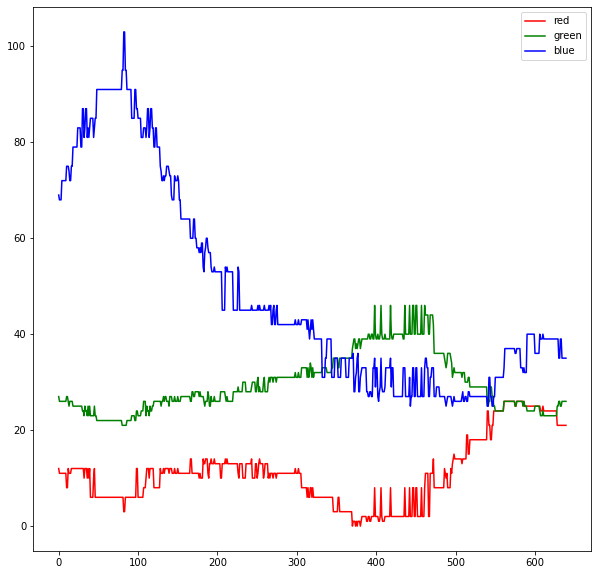

In [36]:
plt.figure(figsize=(10,10))
plt.plot(imar10[100,:]-62,'red',label='red')
plt.plot(imag10[100,:]-62,'green',label='green')
plt.plot(imab10[100,:]-62,'blue',label='blue')
plt.legend()
plt.savefig('my')

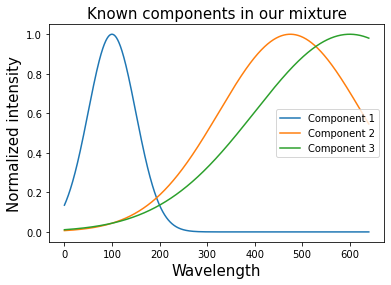

In [37]:
# X-axis (Wavelengths)
x_range =  np.linspace(0, 640, 1000)
# Let's create three different components
# Component A
mu_a10 = 100
sigma_a10 = 50
intensity_a10 = 1
gauss_a10 =  Gauss(x_range, mu_a10, sigma_a10, intensity_a10) 
# Component B
mu_b10 = 475
sigma_b10 = 150
intensity_b10 = 100/100
gauss_b10 = Gauss(x_range, mu_b10, sigma_b10, intensity_b10)
# Component C
mu_c10 = 600
sigma_c10 = 200
intensity_c10 = 1
gauss_c10 = Gauss(x_range, mu_c10, sigma_c10, intensity_c10) 
# Spectra normalization:
component_a10 = gauss_a10/np.max(gauss_a10)
component_b10 = gauss_b10/np.max(gauss_b10)
component_c10 = gauss_c10/np.max(gauss_c10)
# How do they look?
plt.plot(x_range, component_a10, label = 'Component 1')
plt.plot(x_range, component_b10, label = 'Component 2')
plt.plot(x_range, component_c10, label = 'Component 3')
plt.title('Known components in our mixture', fontsize = 15)
plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Normalized intensity', fontsize = 15)
plt.legend()
plt.show()

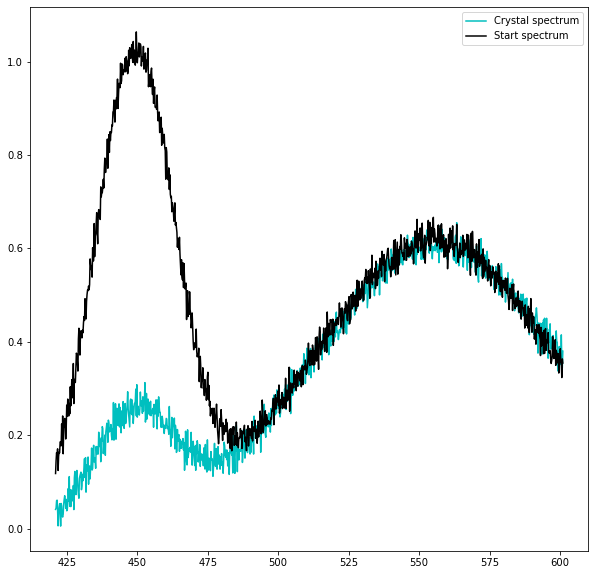

In [38]:
# What concentrations we want them to have in our mixture:
x_range_ = (np.linspace(380, 780, 1000))*0.45+250
c_a10 = 60/250
c_b10 = 140/250
c_c10 = 5/90
# Let's build the spectrum to be studied: The mixture spectrum
query_spectra10 = c_a10 * component_a10 + c_b10 * component_b10 + c_c10 *component_c10
# Let's add it some noise for a bit of realism:
query_spectra10 = query_spectra10 +  np.random.normal(0, 0.02, len(x_range))
plt.figure(figsize=(10,10))
plt.plot(x_range_, query_spectra10* 125/125, color = 'c', label = 'Crystal spectrum')
plt.plot(x_range_, query_spectra9 *125/125 , color = 'black', label = 'Start spectrum')
plt.legend()

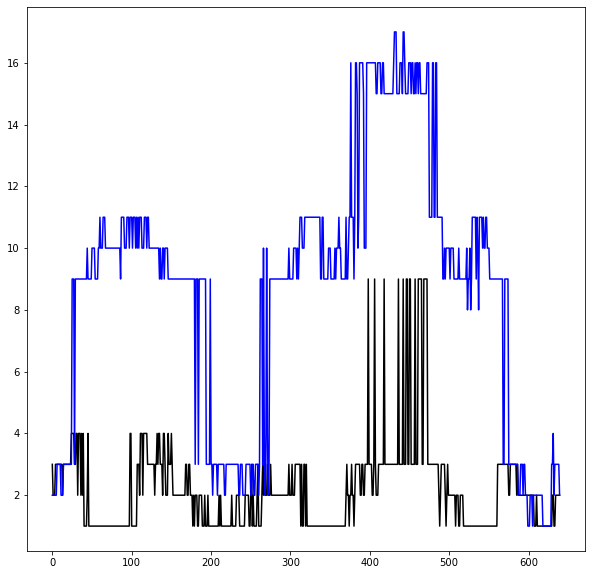

In [39]:
plt.figure(figsize=(10,10))
plt.plot(imal10[100,:]-86,'black')
plt.plot(imal9[100,:]-86,'blue')

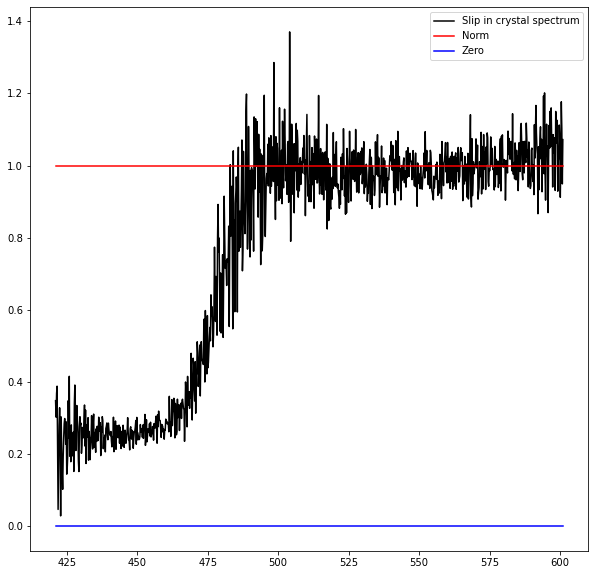

In [40]:
plt.figure(figsize = (10,10))
y_range = np.ones(x_range_.shape)
y_range1 = np.zeros(x_range_.shape)
plt.plot(x_range_, query_spectra10/query_spectra9 , color = 'black', label = 'Slip in crystal spectrum')
plt.plot(x_range_, y_range , color = 'red', label = 'Norm')
plt.plot(x_range_, y_range1 , color = 'blue', label = 'Zero')
plt.legend()